In [1]:
import tensorflow as tf
from imutils import paths
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers

In [2]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images('dataset'))
data = []
labels = []

[INFO] loading images...


In [3]:
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [4]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=(224,224,3)),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

In [6]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1438224   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [7]:
H = model.fit(trainX, trainY, batch_size=32, validation_split=0.2, epochs=20)

Epoch 1/20
10/10 [==============================] - 2s 205ms/step - loss: 1.1824 - accuracy: 0.4969 - val_loss: 0.6860 - val_accuracy: 0.5125
Epoch 2/20
10/10 [==============================] - 0s 43ms/step - loss: 0.6863 - accuracy: 0.5000 - val_loss: 0.6891 - val_accuracy: 0.5125
Epoch 3/20
10/10 [==============================] - 0s 42ms/step - loss: 0.6728 - accuracy: 0.5125 - val_loss: 0.6876 - val_accuracy: 0.5125
Epoch 4/20
10/10 [==============================] - 0s 43ms/step - loss: 0.6481 - accuracy: 0.5938 - val_loss: 0.6607 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 42ms/step - loss: 0.5632 - accuracy: 0.7250 - val_loss: 0.7145 - val_accuracy: 0.5625
Epoch 6/20
10/10 [==============================] - 1s 58ms/step - loss: 0.4441 - accuracy: 0.8156 - val_loss: 0.7716 - val_accuracy: 0.6125
Epoch 7/20
10/10 [==============================] - 1s 54ms/step - loss: 0.3999 - accuracy: 0.8344 - val_loss: 0.7430 - val_accuracy: 0.6625
Epoch 8/20
1

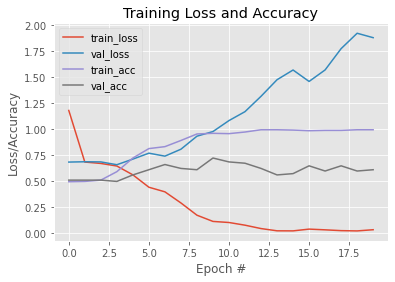

In [8]:
# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("learning_curve.png")

In [9]:
model.save("catdognet.h5")

In [10]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

model.evaluate(testX, testY)

[INFO] evaluating network...
4/4 [==============================] - 0s 17ms/step - loss: 1.5943 - accuracy: 0.6000


[1.5943058729171753, 0.6000000238418579]

In [11]:
model(testX[2:3])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.08798416, 0.91201586]], dtype=float32)>

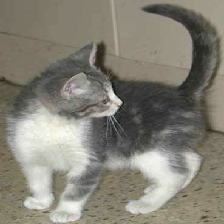

In [12]:
array_to_img(trainX[0])

In [13]:
trainY[0]

array([1., 0.], dtype=float32)

In [14]:
# test on new image
image = load_img('sample_image/5.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)

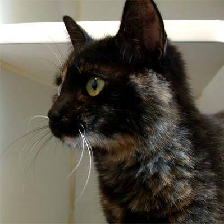

In [15]:
array_to_img(image)

In [16]:
image.shape

(224, 224, 3)

In [17]:
prediction = model(image.reshape(-1,224,224,3))

In [18]:
np.argmax(prediction, axis=1)

array([0])